### Loan Dataset

Problem Statement:- Dream Housing Finance company deals in all home loans. They have presence across all urban, semi-urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan. 

Company wants to automate the loan eligibility process based on customer detail provided while filling online application form. Based on various parameters such as Gender, Martial Status, Education, Number of Dependents, Income , Loan Amount, Credit History and Others. Also, identification of customer segments is essential, those who are eligible for loan amount so that they can specifically target these customers.

In [1]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import Dependencies
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
loan_data= pd.read_csv("C:/Users/bhave/01. Supervised Learning/pandas_for_everyone-master/data/Loan_Status.csv")
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,1


### Feature Description

1. Loan_ID : A unique loan number assigned to each loan customers
2. Gender, Married, Dependents, Education , Self-Employed, Property_Area : A customer's basic demographic information
3. ApplicantIncome, CoapplicantIncome : Income of the applicant and the coapplicant
4. LoanAmount : The amount being applied for Loan
5. Loan_Amount_Term : Duration for the repayment of Loan Amount
6. Credit_History : Credit History of the person
7. Loan_Status : Whether a loan is paid off, in collection, new customer yet to payoff, or paid off after the collection efforts

In [3]:
loan_data.shape

(614, 13)

In [4]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null int64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null int64
dtypes: float64(3), int64(3), object(7)
memory usage: 62.5+ KB


Categorical Features : Loan_ID(alphanumeric), Gender, Married, Dependents, Education, Self_Employed, Property_Area.
    
Numerical Features : ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History and Loan_Status.

In [5]:
loan_data['Credit_History']= loan_data['Credit_History'].astype('object')

3 Float variables : CoapplicantIncome, Loan_Amount_Term and Credit_History
    
3 Int variables : ApplicantIncome, LoanAmount and Loan_Status
    
8 Object variables : Loan_ID , Gender, Married, Dependents, Education, Self_Employed, Property_Area, Credit_History

### Data Description

In [6]:
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status
count,614.000000,614.000000,614.000000,600.00000,614.000000
mean,5403.459283,1621.245798,141.166124,342.00000,0.687296
std,6109.041673,2926.248369,88.340630,65.12041,0.463973
min,150.000000,0.000000,0.000000,12.00000,0.000000
25%,2877.500000,0.000000,98.000000,360.00000,0.000000
50%,3812.500000,1188.500000,125.000000,360.00000,1.000000
75%,5795.000000,2297.250000,164.750000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### Missing Value Analysis

In [7]:
import missingno as msno

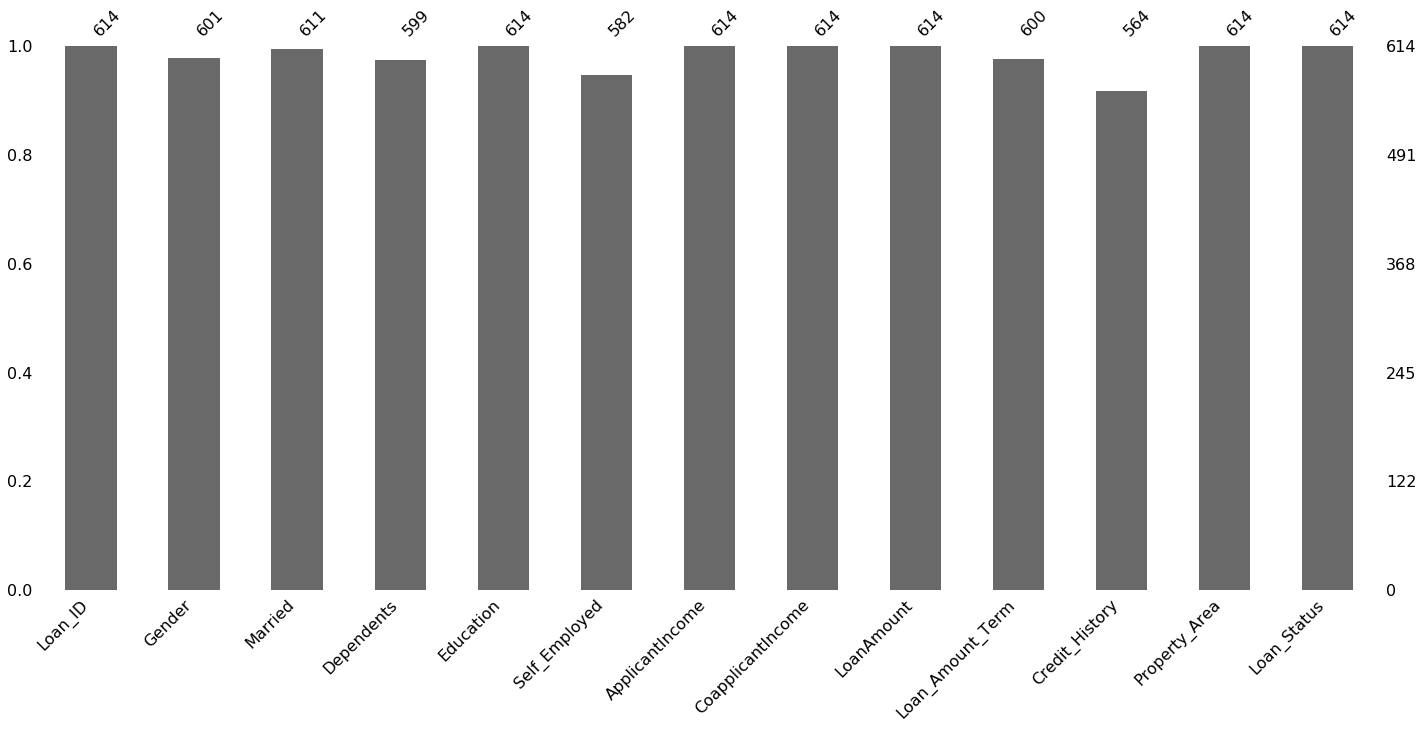

In [8]:
msno.bar(loan_data)

We can observe missing values in features such as "Gender", "Married", "Dependents", "Self-Employed", "Loan_Amount_Term" and "Credit_History".

Column "Loan_ID" isn't relevant for further analysis. Hence, we will dropping the feature.

In [9]:
loan_data= loan_data.drop(['Loan_ID'], axis= 1)

### Impute Missing Values

In [10]:
cat_cols= []

for col in loan_data.select_dtypes("object"):
    cat_cols.append(col)
    loan_data[col]= loan_data[col].astype("category")

In [11]:
cat_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Credit_History',
 'Property_Area']

### Most Common Class Imputation for Categorical Features

One approach to imputing categorical features is to replace missing values with the most common class. 
We can do this by taking the index of the most common feature used in "value_counts" function.

In [12]:
loan_cat_df= loan_data[cat_cols].apply(lambda x: x.fillna(x.value_counts().index[0]))

In [13]:
loan_cat_df.isnull().sum()

Gender            0
Married           0
Dependents        0
Education         0
Self_Employed     0
Credit_History    0
Property_Area     0
dtype: int64

### Imputation for Numerical Features

In [14]:
num_cols= []

for col in loan_data.select_dtypes(['int64', 'float64']):
    num_cols.append(col)

In [15]:
num_cols

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Loan_Status']

In [16]:
def random_imputation(df, feature):
    number_missing = df[feature].isnull().sum()
    observed_values = df.loc[loan_data[feature].notnull(), feature]
#     loan_data.loc[loan_data[feature].isnull(), feature + '_imp'] = np.random.choice(observed_values, 
#                                                                                     number_missing, replace = True)

    df.loc[df[feature].isnull(), feature] = np.random.choice(observed_values, number_missing, replace = True)
    return df

In [17]:
for feature in num_cols:
#     loan_data[feature + '_imp'] = loan_data[feature]
    loan_num_df = pd.DataFrame(random_imputation(loan_data[num_cols], feature))

### Outlier Analysis

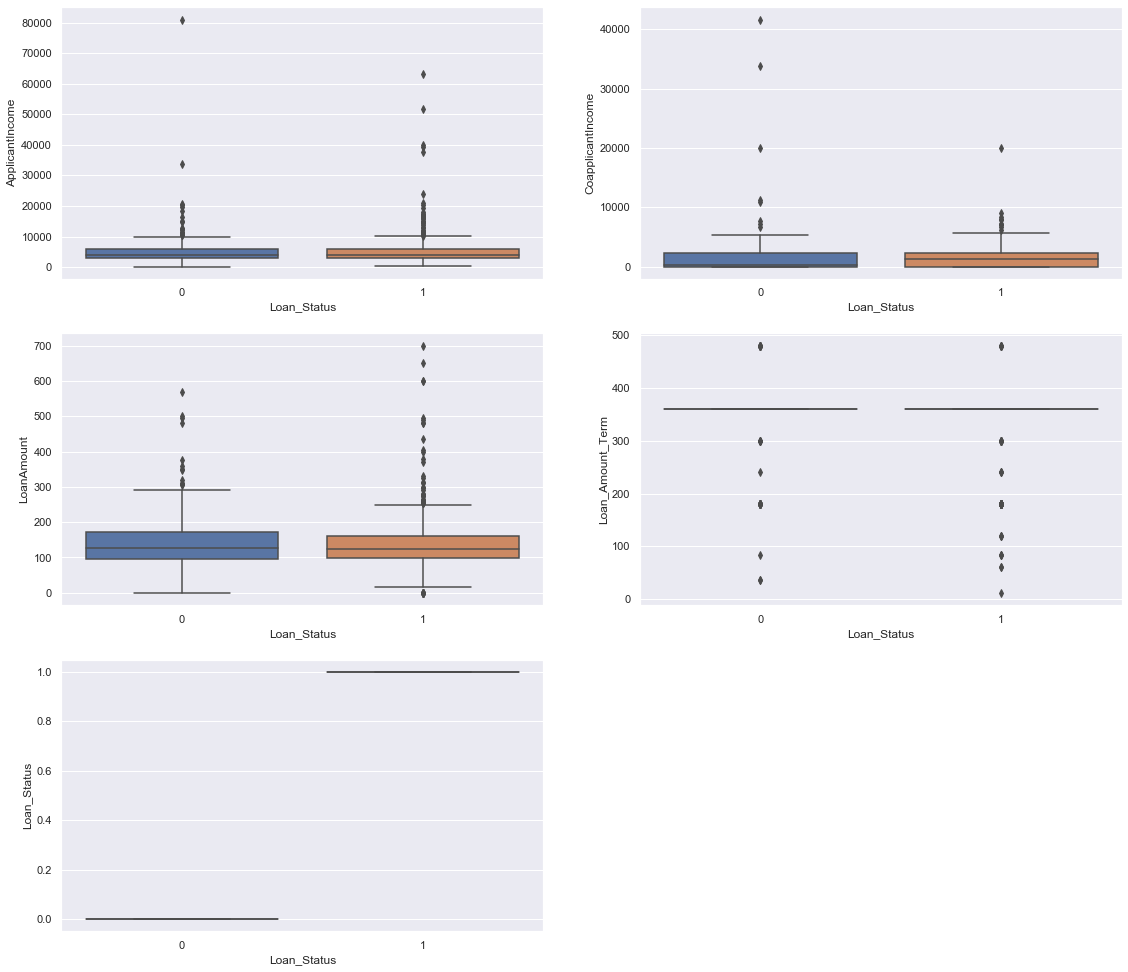

In [18]:
sns.set()
fig = plt.figure(figsize=(19, 17))
i = 1
for col in loan_num_df[num_cols]:
    plt.subplot(3,2,i)
    sns.boxplot(x=loan_num_df['Loan_Status'], y=loan_num_df.loc[:,col])
    i=i+1
plt.tight_layout
plt.show()

In [19]:
loan_num_df.shape

(614, 5)

In [20]:
loan_cat_df.shape

(614, 7)

In [21]:

loan_cat_df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
0,Male,No,0,Graduate,No,1.0,Urban
1,Male,Yes,1,Graduate,No,1.0,Rural
2,Male,Yes,0,Graduate,Yes,1.0,Urban
3,Male,Yes,0,Not Graduate,No,1.0,Urban
4,Male,No,0,Graduate,No,1.0,Urban


In [22]:
loan_data[num_cols] = loan_num_df

In [23]:
loan_data[cat_cols] = loan_cat_df

#### Univariate Analysis

#### Analysing the target variable 'Loan_Status'

In [24]:
loan_data.Loan_Status.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

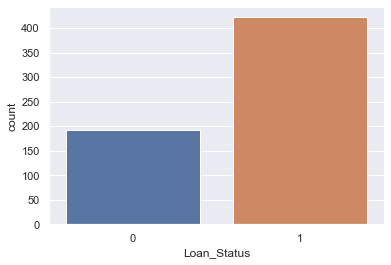

In [25]:
# Distribution of target variable "Loan_Status"
sns.countplot(loan_data['Loan_Status'])

 We can observe the distribution of Loan_Status for customers who are being granted and who aren't.

#### Categorical Features

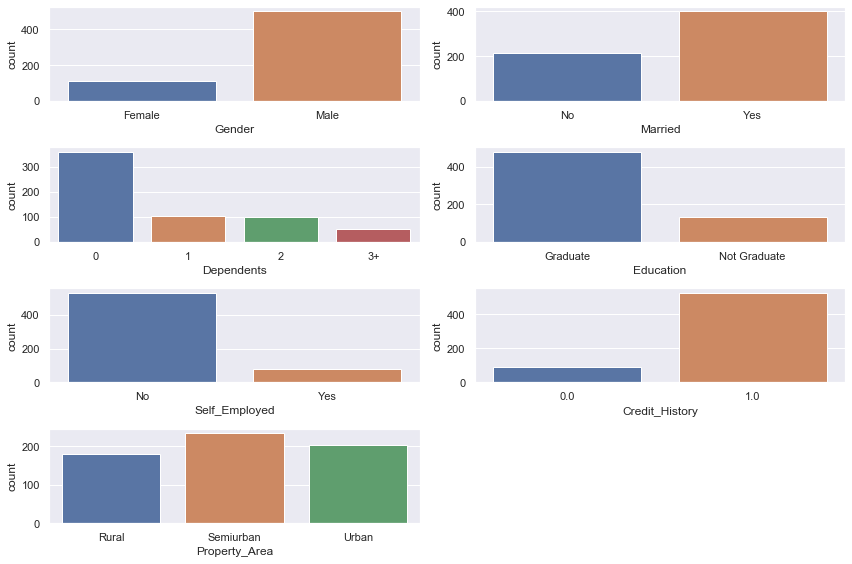

In [26]:
sns.set(rc={'figure.figsize':(12,8)})

i = 1
for column in loan_data.select_dtypes("category"):
    plt.subplot(4,2,i)
    sns.countplot(loan_data[column])
    i = i + 1
                   
plt.tight_layout()
plt.show()

#### Above graphs, shows the distribution of labels in each feature for categorical type.

#### Bi-Variate Analysis

#### Distribution of Loan Amount w.r.t Education of customers

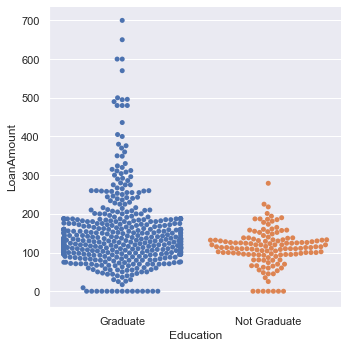

In [27]:
sns.catplot(x='Education', y='LoanAmount', kind='swarm', data=loan_data)

Graduates are having more loan amount than the non-graduates.

#### Relationship of loan_status with other categorical features

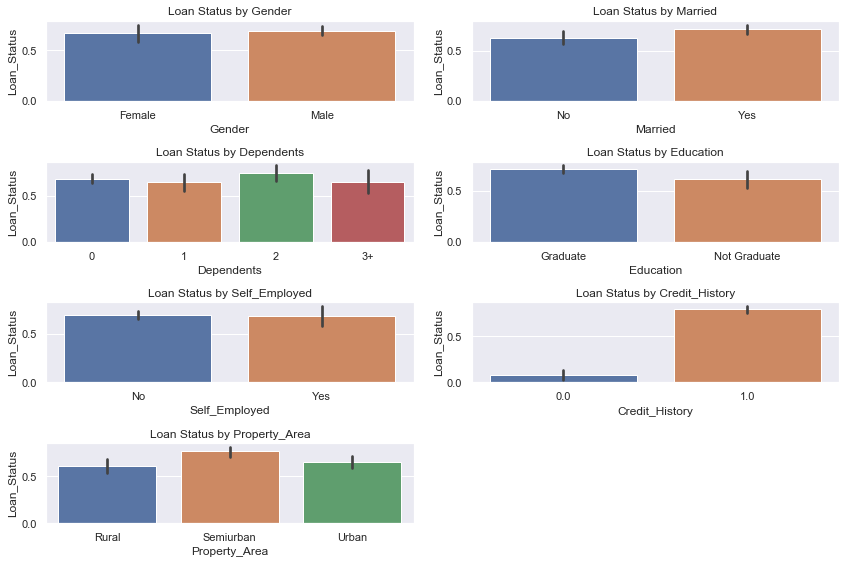

In [28]:
i=1
for cols in loan_data[cat_cols]:
    plt.subplot(4,2,i)
    sns.barplot(x=cols, y='Loan_Status',data=loan_data);
    plt.title('Loan Status by {}'.format(cols))
    i=i+1
    
plt.tight_layout()
plt.show()

#### CORRELATION BETWEEN PREDICTORS

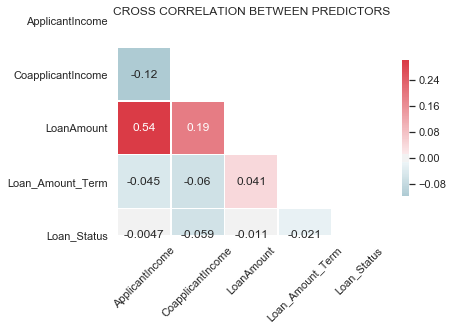

In [29]:
sns.set(style="white")

# Compute the correlation matrix
corr = loan_data.iloc[:,:].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(6, 5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot= True);
plt.xticks(rotation=45)
plt.title("CROSS CORRELATION BETWEEN PREDICTORS", fontsize=12)
plt.show()

Correlation of "LoanAmount" with the "ApplicantIncome".

#### Encoding Categorical Features

In [30]:
from sklearn.preprocessing import LabelEncoder

# target column
tgt_col = ['Loan_Status']

# Categorical cols
category_names = loan_data.nunique()[loan_data.nunique() < 15].keys().tolist()
category_names = [x for x in category_names if x not in tgt_col]

# Numerical cols
num_cols = [i for i in loan_data.columns if i not in category_names + tgt_col]

# Binary cols
bin_cols = loan_data.nunique()[loan_data.nunique()==2].keys().tolist()

# Multi-cols
multi_cols = [i for i in category_names if i not in bin_cols]

# Label Encoding Binary cols
le = LabelEncoder()
for i in bin_cols:
    loan_data[i] = le.fit_transform(loan_data[i])
    
# Duplicating cols for multi-value columns
loan_data = pd.get_dummies(data=loan_data, columns=multi_cols)

In [31]:
loan_data.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_Status,Dependents_0,...,Loan_Amount_Term_84.0,Loan_Amount_Term_120.0,Loan_Amount_Term_180.0,Loan_Amount_Term_240.0,Loan_Amount_Term_300.0,Loan_Amount_Term_360.0,Loan_Amount_Term_480.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,5849,0.0,0,1,1,1,...,0,0,0,0,0,1,0,0,0,1
1,1,1,0,0,4583,1508.0,128,1,0,0,...,0,0,0,0,0,1,0,1,0,0
2,1,1,0,1,3000,0.0,66,1,1,1,...,0,0,0,0,0,1,0,0,0,1
3,1,1,1,0,2583,2358.0,120,1,1,1,...,0,0,0,0,0,1,0,0,0,1
4,1,0,0,0,6000,0.0,141,1,1,1,...,0,0,0,0,0,1,0,0,0,1


#### Normalizing features

In [32]:
cont_features = []
for features in loan_data.select_dtypes(include=['int64','float64']):
    if features != 'Loan_Status':
        cont_features.append(features)

In [33]:
ld_df = loan_data
# Scaling numerical features
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
ld_df[cont_features] = minmax.fit_transform(ld_df[cont_features].values)

In [34]:
ld_df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_Status,Dependents_0,...,Loan_Amount_Term_84.0,Loan_Amount_Term_120.0,Loan_Amount_Term_180.0,Loan_Amount_Term_240.0,Loan_Amount_Term_300.0,Loan_Amount_Term_360.0,Loan_Amount_Term_480.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1.0,0.0,0.0,0.0,0.070489,0.000000,0.000000,1.0,1,1,...,0,0,0,0,0,1,0,0,0,1
1,1.0,1.0,0.0,0.0,0.054830,0.036192,0.182857,1.0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,1.0,1.0,0.0,1.0,0.035250,0.000000,0.094286,1.0,1,1,...,0,0,0,0,0,1,0,0,0,1
3,1.0,1.0,1.0,0.0,0.030093,0.056592,0.171429,1.0,1,1,...,0,0,0,0,0,1,0,0,0,1
4,1.0,0.0,0.0,0.0,0.072356,0.000000,0.201429,1.0,1,1,...,0,0,0,0,0,1,0,0,0,1


#### Model Building

In [35]:
cols = [i for i in ld_df.columns if i not in tgt_col]
X = ld_df[cols]
Y = pd.DataFrame(ld_df['Loan_Status'])

In [36]:
X.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Dependents_0,Dependents_1,...,Loan_Amount_Term_84.0,Loan_Amount_Term_120.0,Loan_Amount_Term_180.0,Loan_Amount_Term_240.0,Loan_Amount_Term_300.0,Loan_Amount_Term_360.0,Loan_Amount_Term_480.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1.0,0.0,0.0,0.0,0.070489,0.000000,0.000000,1.0,1,0,...,0,0,0,0,0,1,0,0,0,1
1,1.0,1.0,0.0,0.0,0.054830,0.036192,0.182857,1.0,0,1,...,0,0,0,0,0,1,0,1,0,0
2,1.0,1.0,0.0,1.0,0.035250,0.000000,0.094286,1.0,1,0,...,0,0,0,0,0,1,0,0,0,1
3,1.0,1.0,1.0,0.0,0.030093,0.056592,0.171429,1.0,1,0,...,0,0,0,0,0,1,0,0,0,1
4,1.0,0.0,0.0,0.0,0.072356,0.000000,0.201429,1.0,1,0,...,0,0,0,0,0,1,0,0,0,1


In [37]:
Y.head()

,Loan_Status
0,1
1,0
2,1
3,1
4,1


#### Using Stratified K-Fold Cross Validation

In [38]:
from sklearn.model_selection import StratifiedKFold

In [39]:
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [40]:
for train_index, test_index in folds.split(X,Y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

#### Using KNN Algorithm

In [41]:
from sklearn.neighbors import KNeighborsClassifier

# Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(X_train, Y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, Y_train)
    
    # Compute accuracy on test set
    test_accuracy[i] = knn.score(X_test, Y_test)

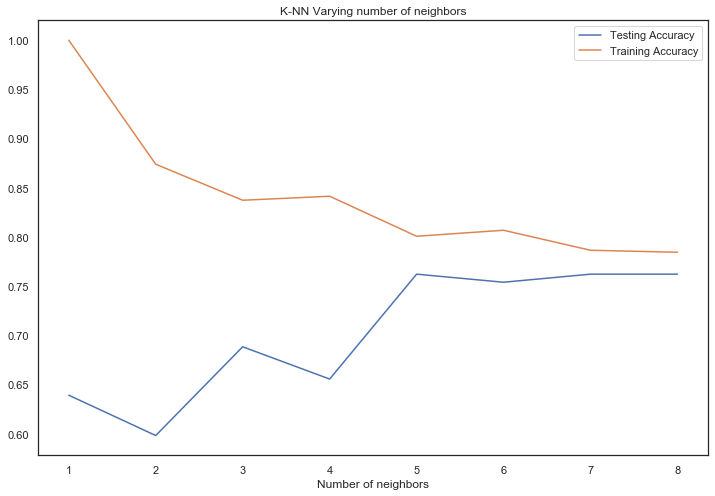

In [42]:
# Generate plot
plt.title('K-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training Accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.show()

#### We are getting maximum testing accuracy when k=5. So lets create a KNeighorsClassifier with number of neigbors as 5.

In [43]:
# Setting up Knn classifier with K neighbors as 5
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [44]:
# Getting accuracy
knn.score(X_test, Y_test)

0.7622950819672131

#### Confusion Matrix

In [45]:
from sklearn.metrics import confusion_matrix

In [46]:
#let us get the predictions using the classifier we had fit above
Y_pred = knn.predict(X_test)

In [47]:
confusion_matrix(Y_test, Y_pred)

array([[12, 26],
       [ 3, 81]], dtype=int64)

#### Classification Report

In [48]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_pred))

             precision    recall  f1-score   support

          0       0.80      0.32      0.45        38
          1       0.76      0.96      0.85        84

avg / total       0.77      0.76      0.73       122



#### ROC (Reciever Operating Characteristic) Curve

It is the plot of the true positive rate against the false positive rate for the different possible cutpoints of a diagnostic test.

In [49]:
Y_pred_proba = knn.predict_proba(X_test)[:,1]

In [50]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds  = roc_curve(Y_test, Y_pred_proba)

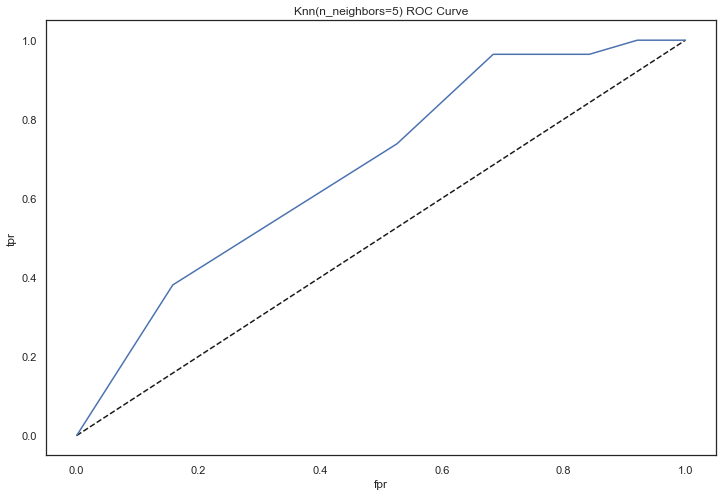

In [51]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=5) ROC Curve')
plt.show()

In [52]:
# Area under curve
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, Y_pred_proba)

0.6793546365914788

#### Hyperparameter tuning

The value of k=5 , we selected was a primitive value of hyperparameter tuning. However, scikit-learn provides a simple way of achieiving this using GridSearchCV i.e. Grid Search cross-validation.

In [53]:
from sklearn.model_selection import GridSearchCV

# parameter for tuning is nearest neighbors
param_grid = {'n_neighbors':np.arange(1,50)}

knn=KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X,Y)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [54]:
knn_cv.best_score_

0.742671009771987

In [55]:
knn_cv.best_params_

{'n_neighbors': 14}

#### We can conclude that the number of nearest neigbors as 14 achieves best score/ accuracy .